In [95]:
import pandas as pd 
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/fake_or_real_news.csv")

In [8]:
print (df.shape)
df.set_index("Unnamed: 0")
df.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [11]:
y = df.label
df.drop("label", axis=1)

X_train, X_test, y_train, y_test = train_test_split (
    df['text'], y, test_size=0.33, random_state=53
)

In [15]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [17]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [19]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

# Get the feature names of `count_vectorizer` 
print(count_vectorizer.get_feature_names()[:10])

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']
['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']


> It is more important to NOT label real news articles as fake. All fakes MUST be labelled fake. NO real must be labelled Fake. Any fake may/may not be fake. (since humans will be reading it. they can judge in the worst case 😄)

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Model: MultinomialNB (Bayesian)

## Performance of Tf-IDF

accuracy:   0.857
Confusion matrix, without normalization


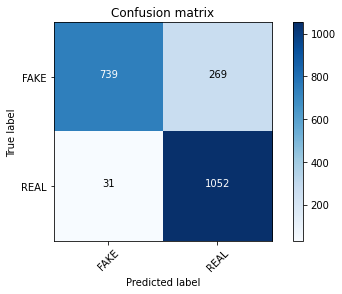

In [34]:
clf = MultinomialNB ()

clf.fit (tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)

print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
`b
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

The model detected 1052 true positives (news that was Real was correctly marked Real) and 739 true negatives (news that was Fake was correctly marked Fake). But there were 31 news articles that were predicted Fake but were actually real (worrisome), and 269 articles that were Real but were predicted Fake. 

## Performance of Bag of Words (CountVectorizer)

accuracy:   0.893
Confusion matrix, without normalization


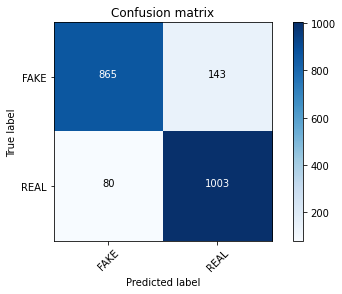

In [35]:
clf2 = MultinomialNB()
clf2.fit(count_train, y_train)
pred = clf2.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

The model detected 1003 true positives (news that was Real was correctly marked Real) and 865 true negatives (news that was Fake was correctly marked Fake). But there were 80 news articles that were predicted Fake but were actually real (worrisome), and 143 articles that were Real but were predicted Fake. 

### Outcome: CountVectorizer performs better than TF-IDF

### 📝 scratch space

In [94]:

news = "U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sunday’s unity march against terrorism.\n\nKerry said he expects to arrive in Paris Thursday evening, as he heads home after a week abroad. He said he will fly to France at the conclusion of a series of meetings scheduled for Thursday in Sofia, Bulgaria. He plans to meet the next day with Foreign Minister Laurent Fabius and President Francois Hollande, then return to Washington.\n\nThe visit by Kerry, who has family and childhood ties to the country and speaks fluent French, could address some of the criticism that the United States snubbed France in its darkest hour in many years.\n\nThe French press on Monday was filled with questions about why neither President Obama nor Kerry attended Sunday’s march, as about 40 leaders of other nations did. Obama was said to have stayed away because his own security needs can be taxing on a country, and Kerry had prior commitments.\n\nAmong roughly 40 leaders who did attend was Israeli Prime Minister Benjamin Netanyahu, no stranger to intense security, who marched beside Hollande through the city streets. The highest ranking U.S. officials attending the march were Jane Hartley, the ambassador to France, and Victoria Nuland, the assistant secretary of state for European affairs. Attorney General Eric H. Holder Jr. was in Paris for meetings with law enforcement officials but did not participate in the march.\n\nKerry spent Sunday at a business summit hosted by India’s prime minister, Narendra Modi. The United States is eager for India to relax stringent laws that function as barriers to foreign investment and hopes Modi’s government will act to open the huge Indian market for more American businesses.\n\nIn a news conference, Kerry brushed aside criticism that the United States had not sent a more senior official to Paris as “quibbling a little bit.” He noted that many staffers of the American Embassy in Paris attended the march, including the ambassador. He said he had wanted to be present at the march himself but could not because of his prior commitments in India.\n\n“But that is why I am going there on the way home, to make it crystal clear how passionately we feel about the events that have taken place there,” he said.\n\n“And I don’t think the people of France have any doubts about America’s understanding of what happened, of our personal sense of loss and our deep commitment to the people of France in this moment of trauma."
my_news = count_vectorizer.transform([news])
clf.predict(my_news)


array(['REAL'], dtype='<U4')

# Model: Linear Model (PassiveAggressiveClassifier)

In [ ]:
linear_clf = PassiveAggressiveClassifier(n_iter=50)
linear_clf.fit(tfidf_train, y_train)